In [2]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import costum_functions as cf

slack_url = pickle.load(open('slackUrl.pickle', 'rb'))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [3]:
import datetime

def addDays(date):
    temp = date.split("-")
    year, month, date = int(temp[0]), int(temp[1]), int(temp[2])
    return datetime.datetime(year, month, date).weekday()

In [ ]:
# df_train_with_weather["day"] = df_train_with_weather["date"].apply(addDays)

In [4]:
df_train.tail()

,date,store_nbr,item_nbr,units
4617595,2014-10-31,45,107,0
4617596,2014-10-31,45,108,0
4617597,2014-10-31,45,109,0
4617598,2014-10-31,45,110,0
4617599,2014-10-31,45,111,0


In [5]:
df_key.tail()

,store_nbr,station_nbr
40,41,12
41,42,14
42,43,11
43,44,12
44,45,16


In [6]:
df_weather.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
20512,16,2014-10-31,53,34,44,M,35,41,21,0,-,-,,M,0.00,29.90,29.99,4.5,03,5.3
20513,17,2014-10-31,59,34,47,M,32,41,18,0,-,-,RA,0.0,0.00,29.72,30.39,9.2,01,9.3
20514,18,2014-10-31,67,49,58,-4,40,50,7,0,0644,1738,,0.0,0.00,29.78,30.28,10.6,36,11.2
20515,19,2014-10-31,45,33,39,-6,24,32,26,0,0624,1646,RA SN,0.1,0.02,29.51,30.24,20.4,34,20.9
20516,20,2014-10-31,68,50,59,M,39,50,6,0,-,-,,0.0,0.00,29.57,30.27,10.5,36,11.2


In [7]:
df_test.tail()

,date,store_nbr,item_nbr
526912,2014-10-26,45,107
526913,2014-10-26,45,108
526914,2014-10-26,45,109
526915,2014-10-26,45,110
526916,2014-10-26,45,111


In [3]:
df_train_key = df_train.merge(df_key, on=["store_nbr"], how="inner")
df_train_key.tail()

,date,store_nbr,item_nbr,units,station_nbr
4617595,2014-10-31,35,107,0,5
4617596,2014-10-31,35,108,0,5
4617597,2014-10-31,35,109,0,5
4617598,2014-10-31,35,110,0,5
4617599,2014-10-31,35,111,0,5


In [4]:
total = df_train_key.merge(df_weather, on=["date","station_nbr"], how="inner")
total.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4617595,2014-10-31,35,107,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617596,2014-10-31,35,108,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617597,2014-10-31,35,109,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617598,2014-10-31,35,110,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617599,2014-10-31,35,111,0,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M


KeyError: ('store_nbr', 'item_nbr', 'units')

KeyError: 'Column not found: True'

In [28]:
def column_type(df):
    columns_ls = list(df.columns)
    for column in columns_ls:
        print("{} : {}".format(str(column),str(total[column].dtype)))
        
column_type(total)

date : object
store_nbr : int64
item_nbr : int64
units : int64
station_nbr : int64
tmax : object
tmin : object
tavg : object
depart : object
dewpoint : object
wetbulb : object
heat : object
cool : object
sunrise : object
sunset : object
codesum : object
snowfall : object
preciptotal : object
stnpressure : object
sealevel : object
resultspeed : object
resultdir : object
avgspeed : object


In [16]:
total_nonzero = total[total["units"]!=0]
total_nonzero.tail()

,date,store_nbr,item_nbr,units,station_nbr,tmax,tmin,tavg,depart,dewpoint,...,sunrise,sunset,codesum,snowfall,preciptotal,stnpressure,sealevel,resultspeed,resultdir,avgspeed
4617332,2014-10-29,35,66,14,5,M,M,M,M,55,...,0613,1643,,M,M,M,29.87,8.2,23,M
4617393,2014-10-30,35,16,16,5,M,M,M,M,38,...,0615,1641,,M,M,M,29.95,8.3,30,M
4617443,2014-10-30,35,66,6,5,M,M,M,M,38,...,0615,1641,,M,M,M,29.95,8.3,30,M
4617504,2014-10-31,35,16,18,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M
4617554,2014-10-31,35,66,10,5,M,M,M,M,37,...,0616,1640,,M,M,M,30.01,10.8,05,M


In [19]:
len(total_nonzero)

118696

In [ ]:
# station별로 missing data 일단 삭제해서 pairplot으로 상관관계를 보자(station 6~10)

In [97]:
# M value row 모두 삭제
# T value 모두 0으로 변환
df_station_6 = df_weather[df_weather["station_nbr"]==6].reset_index(drop=True)
df_station_7 = df_weather[df_weather["station_nbr"]==7].reset_index(drop=True)
df_station_8 = df_weather[df_weather["station_nbr"]==8].reset_index(drop=True)
df_station_9 = df_weather[df_weather["station_nbr"]==9].reset_index(drop=True)
df_station_10 = df_weather[df_weather["station_nbr"]==10].reset_index(drop=True)

In [98]:
len(df_station_6),len(df_station_7), len(df_station_8), len(df_station_9), len(df_station_10)

(1035, 1035, 1035, 1035, 1035)

In [208]:
def isThereNoneData(df, percentage=60):
    """
        Missing data, Trace data의 개수정보를 받아서 만든 dataframe을 리턴한다.
        패러미터는 df만 받는다.(weather df에서만 M, T가 존재하므로 그 외에는 의미가 없다.)
    """
    columns = ["Column", "Row Count", "Missing Data", "M Data %", "Trace Data", "T Data %", "Bar Data", "B Data %"]
    li = list(df.columns)
    m_count_li = []
    t_count_li = []
    b_count_li = []    
    row_count_li = []
    m_percent_li = []
    t_percent_li = []
    b_percent_li = []
    for l in li:
        m_count = 0
        t_count = 0
        b_count = 0
        for i, contents in enumerate(df[l]):
            contents = str(contents)
            if(contents.strip() == "M"):
                m_count += 1
            if(contents.strip() == "T"):
                t_count += 1
            if(contents.strip() == "-"):
                b_count += 1            
        m_count_li.append(m_count)
        t_count_li.append(t_count)
        b_count_li.append(b_count)
        row_count_li.append(len(df[l]))
        m_percent_li.append(round(m_count/len(df[l])*100,2))
        t_percent_li.append(round(t_count/len(df[l])*100,2))
        b_percent_li.append(round(b_count/len(df[l])*100,2))
#         m_percent_li.append("{}%".format(round(m_count/len(df[l])*100,2)))
#         t_percent_li.append("{}%".format(round(t_count/len(df[l])*100,2)))
#         b_percent_li.append("{}%".format(round(b_count/len(df[l])*100,2)))
    result_df = pd.DataFrame({"Column" : li, "Row Count" : row_count_li,
                         "Missing Data" : m_count_li, "M Data %" : m_percent_li,
                         "Trace Data" : t_count_li, "T Data %": t_percent_li,
                         "Bar Data" : b_count_li, "B Data %" : b_percent_li}, columns=columns) 

    print("M Data over {}% : {}".format(percentage, list(result_df["Column"][result_df["M Data %"] >= percentage])))
    print("T Data over {}% : {}".format(percentage, list(result_df["Column"][result_df["T Data %"] >= percentage])))
    print("B Data over {}% : {}".format(percentage, list(result_df["Column"][result_df["B Data %"] >= percentage])))
#     print(result_df[result_df.loc["M Data %"]=="100.0%"].columns)
    return result_df

In [184]:
isThereNoneData_1(df_station_6)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,2,0.19,0,0.00,0,0.0
3,tmin,1035,2,0.19,0,0.00,0,0.0
4,tavg,1035,6,0.58,0,0.00,0,0.0
5,depart,1035,37,3.57,0,0.00,0,0.0
6,dewpoint,1035,0,0.00,0,0.00,0,0.0
7,wetbulb,1035,3,0.29,0,0.00,0,0.0
8,heat,1035,6,0.58,0,0.00,0,0.0
9,cool,1035,6,0.58,0,0.00,0,0.0


In [185]:
isThereNoneData_1(df_station_7)

M Data over 60% : ['depart']
T Data over 60% : []
B Data over 60% : ['sunrise', 'sunset']


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,35,3.38,0,0.00,0,0.0
3,tmin,1035,34,3.29,0,0.00,0,0.0
4,tavg,1035,41,3.96,0,0.00,0,0.0
5,depart,1035,1035,100.00,0,0.00,0,0.0
6,dewpoint,1035,37,3.57,0,0.00,0,0.0
7,wetbulb,1035,42,4.06,0,0.00,0,0.0
8,heat,1035,41,3.96,0,0.00,0,0.0
9,cool,1035,41,3.96,0,0.00,0,0.0


In [186]:
df_station_8_1 = isThereNoneData_1(df_station_8)
df_station_8_1

M Data over 60% : ['depart', 'snowfall', 'sealevel']
T Data over 60% : []
B Data over 60% : ['sunrise', 'sunset']


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,14,1.35,0,0.00,0,0.0
3,tmin,1035,12,1.16,0,0.00,0,0.0
4,tavg,1035,468,45.22,0,0.00,0,0.0
5,depart,1035,1035,100.00,0,0.00,0,0.0
6,dewpoint,1035,50,4.83,0,0.00,0,0.0
7,wetbulb,1035,64,6.18,0,0.00,0,0.0
8,heat,1035,468,45.22,0,0.00,0,0.0
9,cool,1035,468,45.22,0,0.00,0,0.0


In [166]:
print("M data % over 60% : {}".format(list(df_station_8_1["Column"][df_station_8_1["M Data %"] >= 60])))
print("T data % over 60% : {}".format(list(df_station_8_1["Column"][df_station_8_1["T Data %"] >= 60])))
print("B data % over 60% : {}".format(list(df_station_8_1["Column"][df_station_8_1["B Data %"] >= 60])))
# df_station_8_1["Column"][df_station_8_1["T Data %"] >= 60]

M data % over 60% : ['depart', 'snowfall', 'sealevel']
T data % over 60% : []
B data % over 60% : ['sunrise', 'sunset']


In [187]:
isThereNoneData_1(df_station_9)

M Data over 60% : ['depart', 'snowfall']
T Data over 60% : []
B Data over 60% : ['sunrise', 'sunset']


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,6,0.58,0,0.00,0,0.0
3,tmin,1035,7,0.68,0,0.00,0,0.0
4,tavg,1035,19,1.84,0,0.00,0,0.0
5,depart,1035,1035,100.00,0,0.00,0,0.0
6,dewpoint,1035,16,1.55,0,0.00,0,0.0
7,wetbulb,1035,64,6.18,0,0.00,0,0.0
8,heat,1035,19,1.84,0,0.00,0,0.0
9,cool,1035,19,1.84,0,0.00,0,0.0


In [188]:
isThereNoneData_1(df_station_10)

M Data over 60% : ['depart', 'snowfall']
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,station_nbr,1035,0,0.00,0,0.00,0,0.0
1,date,1035,0,0.00,0,0.00,0,0.0
2,tmax,1035,0,0.00,0,0.00,0,0.0
3,tmin,1035,0,0.00,0,0.00,0,0.0
4,tavg,1035,8,0.77,0,0.00,0,0.0
5,depart,1035,1035,100.00,0,0.00,0,0.0
6,dewpoint,1035,0,0.00,0,0.00,0,0.0
7,wetbulb,1035,3,0.29,0,0.00,0,0.0
8,heat,1035,8,0.77,0,0.00,0,0.0
9,cool,1035,8,0.77,0,0.00,0,0.0


In [189]:
def changeTypeToInt(a):
    temp = str(a).strip()
    if temp == 'M' or temp == '-':
        return np.nan
    else:
        return int(a)
    
def changeTypeToFloat(a):
    temp = str(a).strip()
    if temp == 'M':
        return np.nan
    elif temp == 'T' or temp == '-':
        return 0
    else:
        return float(a)
    
def remove_m_row(df, columns = []):
    """
        m_row를 제거할 data_frame 파일을 df 패러미터로 넣어준다.
        columns를 패러미터로 안넣어줄 경우에는 전체 컬럼의 m값을 날린다.
        columns를 넣어주는 경우에는 반드시 리스트로 넣어줄것!! 예:) ["tmax", "tmin"]
        그리고 처리된 df를 리턴하는 것이므로!! 원하는 변수명으로 받아줄 것
        예:) df_test = remove_m_row(df_weather, ["tmax", "tmin"])
    """
    result_df = df.copy()
    if len(columns) == 0:
        columns = result_df.columns
    cols_int = ["tmax", "tmin", "tavg", "dewpoint", "wetbulb", "heat", "cool", "sunrise", "sunset"]
    cols_float = ["snowfall", "preciptotal", "stnpressure", "sealevel", "depart", "resultspeed", "resultdir", "avgspeed"]
    for column in columns:
#         print(column)
        if column in cols_int:
            result_df[column] = result_df[column].apply(changeTypeToInt)
        elif column in cols_float:
            result_df[column] = result_df[column].apply(changeTypeToFloat)
    return result_df.dropna()

# weather = pd.read_csv("../asset/weather.csv") 테스트 용으로 추가해놓은 line입니다.

In [190]:
# 아래 예는 1번 스테이션을 이용했음.

station_1 = df_weather[df_weather["station_nbr"] == 1].reset_index(drop=True) 
station_1.drop("snowfall", axis=1, inplace=True) # 1번 경우에는 snowfall 컬럼 전체가 m 이므로 drop
station_1.drop("depart", axis=1, inplace=True) # 위와 동일
station_1_only_dropped_t = station_1.copy() # copy안하면 station_1이 변할 수 있으니 보호한다.
station_1_only_dropped_t = remove_m_row(station_1_only_dropped_t, ["tmax", "tmin", "tavg"])
station_1_dropped_all = remove_m_row(station_1)
print("원래 station_1의 row 개수" + str(len(station_1)))
print("원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수" + str(len(station_1_only_dropped_t)))
print("원래 전체 컬럼의 m value를 포함한 row를 날린 후 전체 개수" + str(len(station_1_dropped_all)))

원래 station_1의 row 개수1035
원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수1029
원래 전체 컬럼의 m value를 포함한 row를 날린 후 전체 개수0


In [116]:
df_station_6_dropped_all = remove_m_row(df_station_6)
print("원래 station_6의 row 개수" + str(len(df_station_6)))
print("원래 전체 컬럼의 m value를 포함한 row를 날린 후 전체 개수" + str(len(df_station_6_dropped_all)))

원래 station_6의 row 개수1035
원래 전체 컬럼의 m value를 포함한 row를 날린 후 전체 개수986


In [205]:
col_t = ["tmax", "tmin", "tavg"]
col_d = ["dewpoint", "wetbulb"]
col_h = ["heat", "cool"] # , "sunrise", "sunset"
col_s = ["snowfall", "preciptotal", "stnpressure", "sealevel"]
col_w = ["resultspeed", "avgspeed"] #, "resultdir"

In [191]:
df_station_6_only_dropped_t = df_station_6.copy()
df_station_6_only_dropped_t = remove_m_row(df_station_6, col_t)
print("원래 station_6의 row 개수" + str(len(df_station_6)))
print("원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수" + str(len(df_station_6_only_dropped_t)))

원래 station_6의 row 개수1035
원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수1029


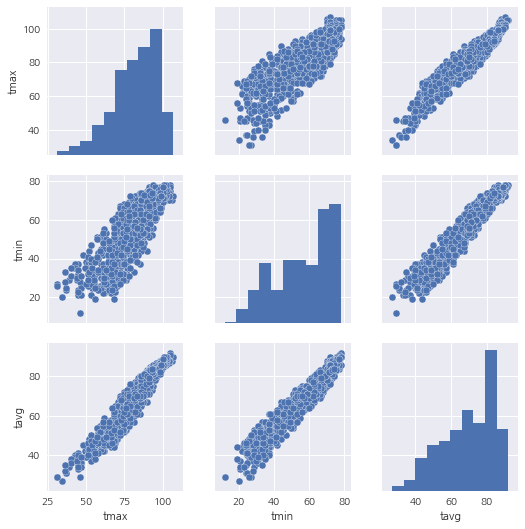

In [192]:
sns.pairplot(df_station_6_only_dropped_t[col_t])
plt.show()

In [193]:
df_station_6_only_dropped_d = df_station_6.copy()
df_station_6_only_dropped_d = remove_m_row(df_station_6, col_d)
print("원래 station_6의 row 개수" + str(len(df_station_6)))
print("원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수" + str(len(df_station_6_only_dropped_d)))

원래 station_6의 row 개수1035
원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수1032


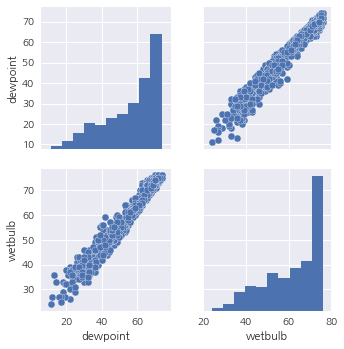

In [194]:
sns.pairplot(df_station_6_only_dropped_d[col_d])
plt.show()

In [206]:
df_station_6_only_dropped_h = df_station_6.copy()
df_station_6_only_dropped_h = remove_m_row(df_station_6, col_h)
print("원래 station_6의 row 개수" + str(len(df_station_6)))
print("원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수" + str(len(df_station_6_only_dropped_h)))

원래 station_6의 row 개수1035
원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수1029


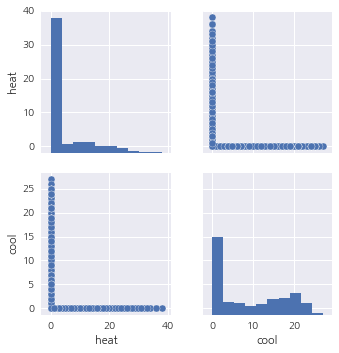

In [207]:
sns.pairplot(df_station_6_only_dropped_h[col_h])
plt.show()

In [197]:
df_station_6_only_dropped_s = df_station_6.copy()
df_station_6_only_dropped_s = remove_m_row(df_station_6, col_s)
print("원래 station_6의 row 개수" + str(len(df_station_6)))
print("원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수" + str(len(df_station_6_only_dropped_s)))

원래 station_6의 row 개수1035
원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수1023


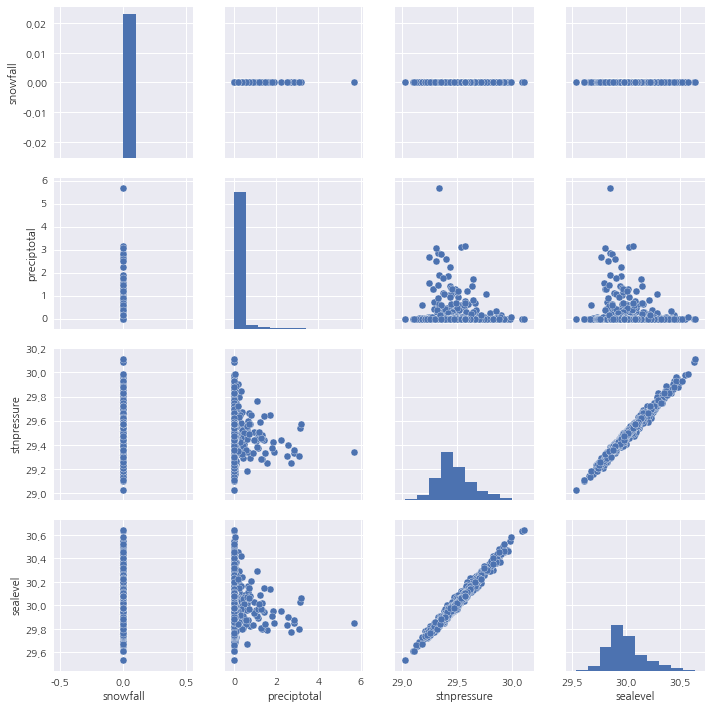

In [198]:
sns.pairplot(df_station_6_only_dropped_s[col_s])
plt.show()

In [203]:
df_station_6_only_dropped_w = df_station_6.copy()
df_station_6_only_dropped_w = remove_m_row(df_station_6, col_w)
print("원래 station_6의 row 개수" + str(len(df_station_6)))
print("원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수" + str(len(df_station_6_only_dropped_w)))

원래 station_6의 row 개수1035
원래 t관련 컬럼의 m value를 포함한 row를 날린 후 전체 개수1033


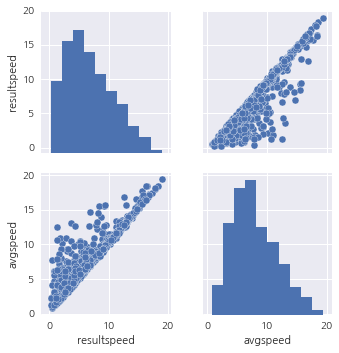

In [204]:
sns.pairplot(df_station_6_only_dropped_w[col_w])
plt.show()